In [26]:
import numpy as np
import pandas as pd
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astroplan import Observer, FixedTarget
from astropy.table import QTable, Table
from astroplan import is_observable, is_always_observable
from astroplan import (AltitudeConstraint, AirmassConstraint, AtNightConstraint)
from astroplan import moon
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range
from astroplan.plots import plot_sky, plot_airmass
from astropy.coordinates import AltAz

In [3]:
# Read in binary star data, convert ra,dec to deg, create FixedTarget objects for each
target_data = QTable.read('binary_stars.csv', format='ascii.csv')
targets = [FixedTarget(coord = SkyCoord(ra = RA, dec = DEC, unit = (u.hourangle , u.deg)),name = Name) for Name, RA, DEC in target_data]

In [4]:
# Setting up the Obeserver object as Haystack and set observing constraints
MDO = Observer.at_site('McDonald Observatory')
constraints = [AirmassConstraint(1.5),AtNightConstraint.twilight_astronomical()]

In [99]:
# Creating Time objects for each date in observing window
dates = [date for date in np.arange(15,31)]
time = ["2019-11-{0}".format(date) for date in np.arange(15,31)]
time = [Time(time, format='iso') for time in time]

In [100]:
# Constraining the observing window to inbetween astronomical twilights  
observe_start = [MDO.twilight_evening_astronomical(time, which='nearest') for time in time]
observe_end = [MDO.twilight_morning_astronomical(time, which='next') for time in time]
# Resetting formats for Time objects to iso
for i in range(len(observe_start)):
    observe_start[i].format = 'iso'
    observe_end[i].format = 'iso'

In [101]:
# Creating a list of observing time ranges on each date
time_range = [Time([observe_start[i],observe_end[i]]) for i in range(len(observe_start))]

In [102]:
# Making list of if an object is observable on a specific night
ever_observable = [is_observable(constraints, MDO, targets, time_range=time_range[i]) for i in range(len(time_range))]
# always_observable = [is_always_observable(constraints, MDO, targets, time_range=time_range[i]) for i in range(len(time_range))]

In [103]:
# Counting the number of nights an object is observable
count = np.zeros(len(targets))
for i in range(len(ever_observable)):
    for j in range(len(targets)):
        if np.count_nonzero(ever_observable[i][j] == 1):
            count[j] += 1 
# Choosing a random 10 objects that are observable for atleast 10 nights 
index = np.random.choice(np.where(count > 10)[0],10)

In [114]:
# Displays the targets that were chosen
ten_target = [targets[i] for i in index]
mn = moon.get_moon(time[0])
mn.name = "Moon"
#ten_target.append(mn)

# How many times for each target can be observe within the windows?

print(count)

[16. 16. 16. 16.  0. 16.  0. 16. 16.  0.  0. 16. 16. 16. 16. 16. 16.  0.
 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.  0. 16.  0.  0.  0. 16.  0.
 16. 16. 16. 16. 16. 16.  0. 16. 16. 16.  0. 16.  0.  1. 10.  4.  3.  3.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  3.  4.  1.  0. 15.  0. 16. 16. 16.  0. 16. 16.  1. 16. 16.
 16. 16. 16.  0. 16. 16.]


In [117]:
for i in time:
    print(moon.moon_illumination(i))

0.9383104449665165
0.8782057277592437
0.7996939451309384
0.7056917587772219
0.6001508934118656
0.48796267859210296
0.37481686099649464
0.266965116058595
0.17082305576750922
0.09238029952139315
0.036482761939428676
0.0061649230393673315
0.0022626543889909256
0.02346408765723801
0.06677821856411015
0.1282305825243833


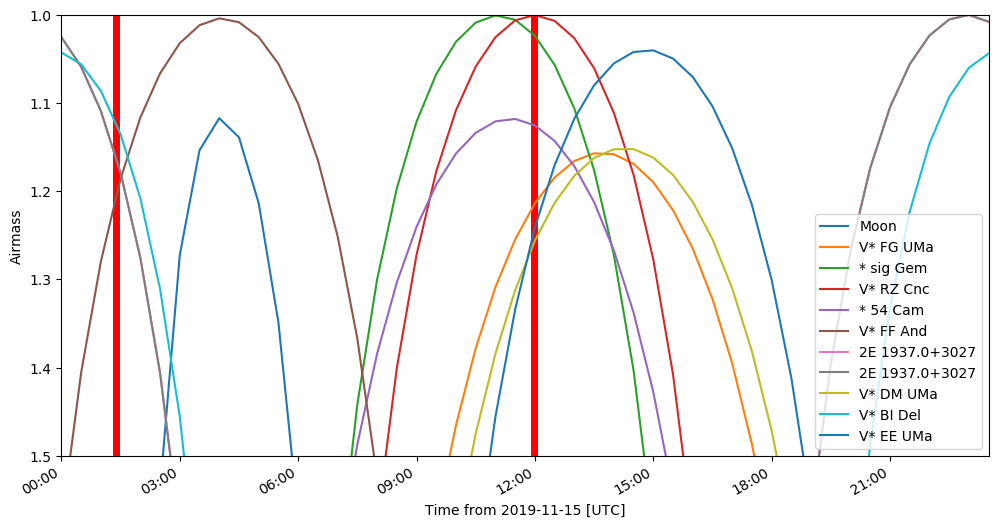

In [105]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()
window_range = [time[0], time[1]]
window_time_grid = time_grid_from_range(window_range)
ax = plot_airmass(mn,MDO,window_time_grid,max_airmass=1.5)
ax.vlines(observe_start[0].datetime, 1,3, color='r', linewidth=5)
ax.vlines(observe_end[0].datetime, 1,3, color='r', linewidth=5)

for i, my_object in enumerate(ten_target):
        ax = plot_airmass(my_object, MDO, window_time_grid, max_airmass=1.5)
        ax.legend()

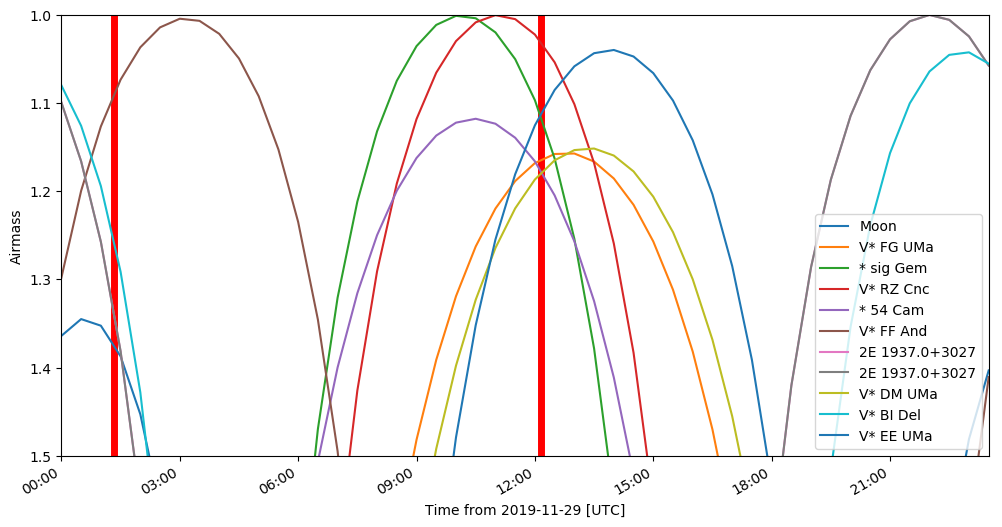

In [106]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()
window_range = [time[-2], time[-1]]
window_time_grid = time_grid_from_range(window_range)
ax = plot_airmass(mn,MDO,window_time_grid,max_airmass=1.5)
ax.vlines(observe_start[-2].datetime, 1,3, color='r', linewidth=5)
ax.vlines(observe_end[-2].datetime, 1,3, color='r', linewidth=5)
for i, my_object in enumerate(ten_target):
        ax = plot_airmass(my_object, MDO, window_time_grid, max_airmass=1.5)
        ax.legend()